In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('spam_mail.csv')

In [3]:
df.sample(5)

,Category,Message
1587,ham,There are no other charges after transfer char...
5190,spam,Our records indicate u maybe entitled to 5000 ...
3534,ham,"Sorry, I'll call later"
1047,ham,"Do 1 thing! Change that sentence into: ""Becaus..."
1031,ham,Can not use foreign stamps in this country. Go...


In [4]:
df.shape

(5572, 2)

In [5]:
##DATA CLEANING

In [6]:
df.info

<bound method DataFrame.info of      Category                                            Message
0         ham  Go until jurong point, crazy.. Available only ...
1         ham                      Ok lar... Joking wif u oni...
2        spam  Free entry in 2 a wkly comp to win FA Cup fina...
3         ham  U dun say so early hor... U c already then say...
4         ham  Nah I don't think he goes to usf, he lives aro...
...       ...                                                ...
5567     spam  This is the 2nd time we have tried 2 contact u...
5568      ham               Will ü b going to esplanade fr home?
5569      ham  Pity, * was in mood for that. So...any other s...
5570      ham  The guy did some bitching but I acted like i'd...
5571      ham                         Rofl. Its true to its name

[5572 rows x 2 columns]>

In [7]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [8]:
df['Category'] = encoder.fit_transform(df['Category'])

In [9]:
df.head()

,Category,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [10]:
#missing value
df.isnull().sum()

Category    0
Message     0
dtype: int64

In [11]:
#duplicate value
df.duplicated().sum()

415

In [12]:
#remove duplicate value
df = df.drop_duplicates(keep='first')

In [13]:
df.duplicated().sum()

0

In [14]:
df.shape

(5157, 2)

In [15]:
##EDA

In [16]:
df['Category'].value_counts()

Category
0    4516
1     641
Name: count, dtype: int64

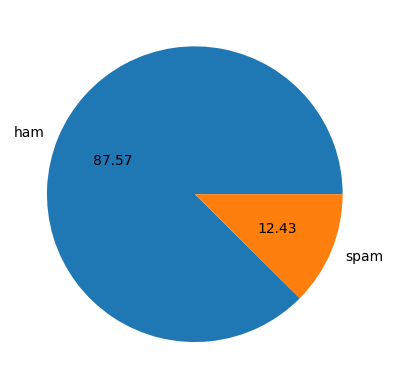

In [17]:
import matplotlib.pyplot as plt
plt.pie(df['Category'].value_counts(), labels =['ham','spam'],autopct = "%0.2f")
plt.show()

In [18]:
#data is imbalance
import nltk

In [19]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\soury\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [20]:
df['num_characters'] = df['Message'].apply(len)
df.head()

,Category,Message,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [21]:
#number of words
df['num_words']=df['Message'].apply(lambda x:len(nltk.word_tokenize(x)))

In [22]:
df.head()

,Category,Message,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [23]:
df['num_sentences']=df['Message'].apply(lambda x:len(nltk.sent_tokenize(x)))
df.head()

,Category,Message,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [24]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5157.000000,5157.000000,5157.000000
mean,79.104324,18.560403,1.969750
std,58.384729,13.405970,1.455526
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,61.000000,15.000000,1.000000
75%,118.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [25]:
#ham messages
df[df['Category'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.869796,17.267715,1.827724
std,56.710489,13.588065,1.394338
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,53.000000,13.000000,1.000000
75%,91.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [26]:
#spam messages
df[df['Category'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,641.000000,641.000000,641.000000
mean,137.118565,27.667707,2.970359
std,30.399707,7.103501,1.485575
min,7.000000,2.000000,1.000000
25%,130.000000,25.000000,2.000000
50%,148.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,223.000000,46.000000,9.000000


In [27]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

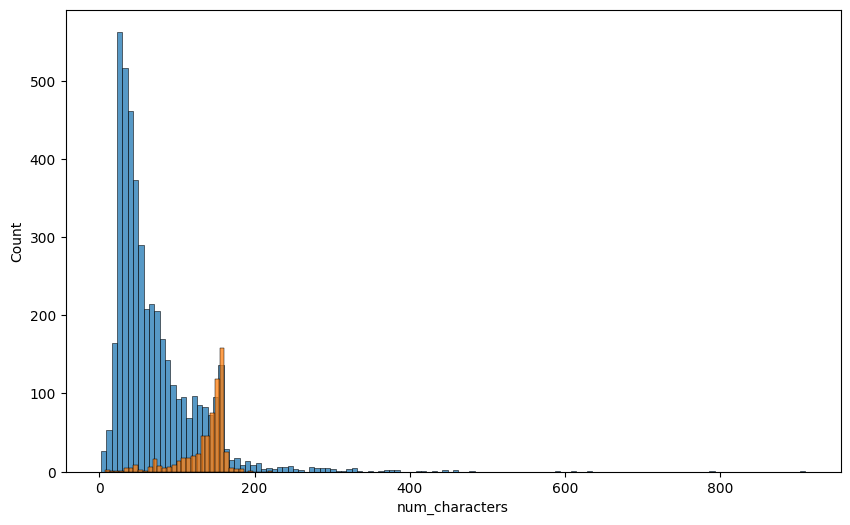

In [28]:
plt.figure(figsize=(10,6))
sns.histplot(df[df['Category'] == 0]['num_characters'])
sns.histplot(df[df['Category'] == 1]['num_characters'])

<Axes: xlabel='num_words', ylabel='Count'>

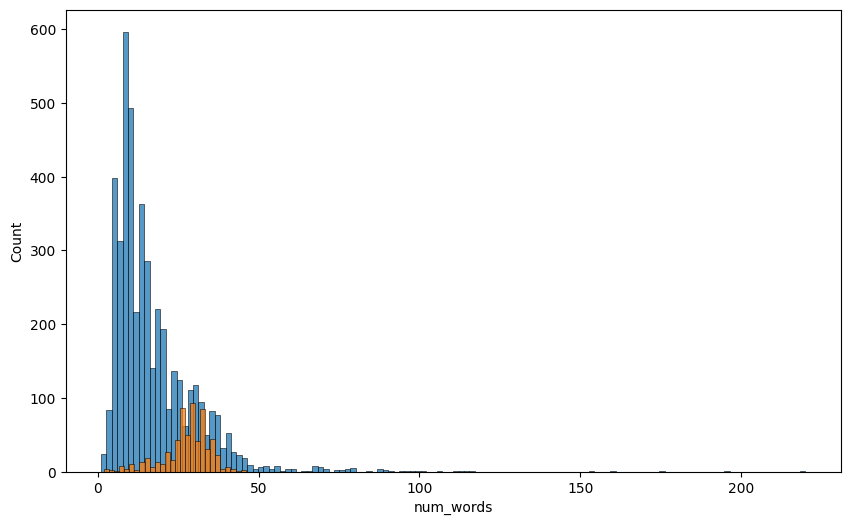

In [29]:
plt.figure(figsize=(10,6))
sns.histplot(df[df['Category'] == 0]['num_words'])
sns.histplot(df[df['Category'] == 1]['num_words'])

<Axes: xlabel='num_sentences', ylabel='Count'>

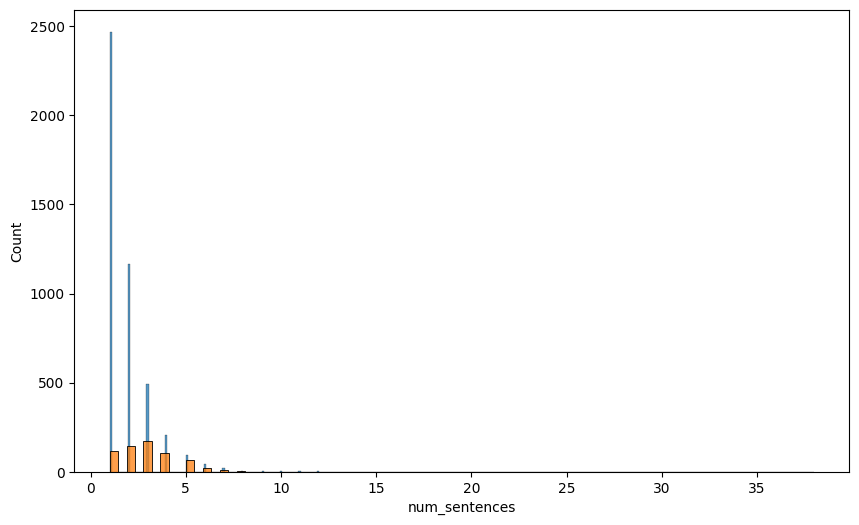

In [30]:
plt.figure(figsize=(10,6))
sns.histplot(df[df['Category'] == 0]['num_sentences'])
sns.histplot(df[df['Category'] == 1]['num_sentences'])

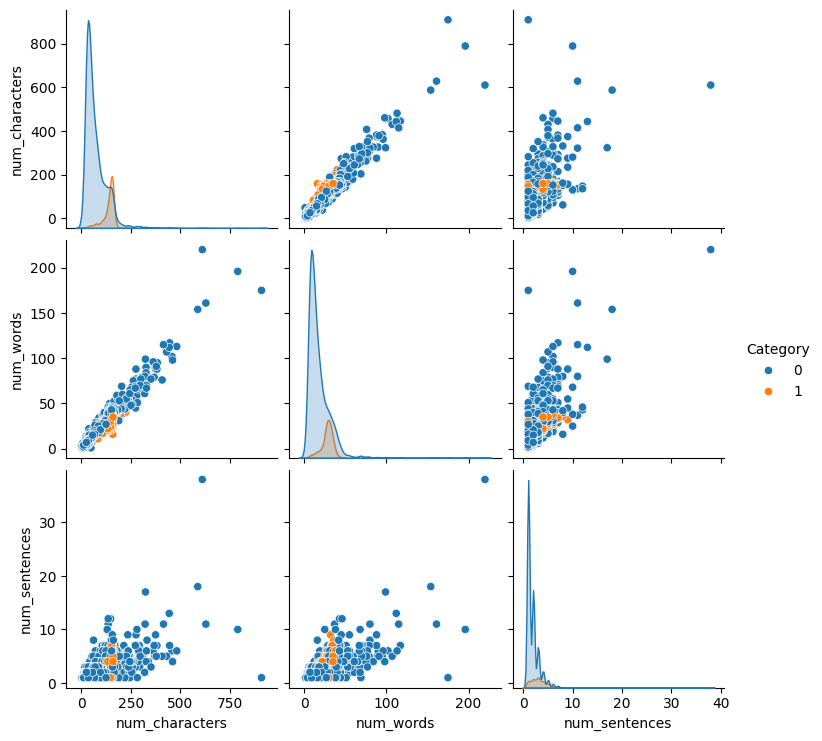

In [31]:
sns.pairplot(df,hue='Category')

In [32]:
#DATA PROCESSING

In [33]:
import nltk 
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\soury\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [34]:
import string

In [35]:
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()
ps.stem('coding')

'code'

In [36]:
def transform_text(text):
    text=text.lower()
    text=nltk.word_tokenize(text)
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)

    text=y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    text=y[:]
    y.clear()

    for i in text :
        y.append(ps.stem(i))
        
    return " ".join(y)

In [37]:
transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.")

'gon na home soon want talk stuff anymor tonight k cri enough today'

In [38]:
df['transform_text'] = df['Message'].apply(transform_text)

In [39]:
df.head()

,Category,Message,num_characters,num_words,num_sentences,transform_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [40]:
from wordcloud import WordCloud
wc = WordCloud(width=600,height=600,max_font_size=200,background_color='white')

In [41]:
spam_wc = wc.generate(df[df['Category'] == 1]['transform_text'].str.cat(sep=" "))

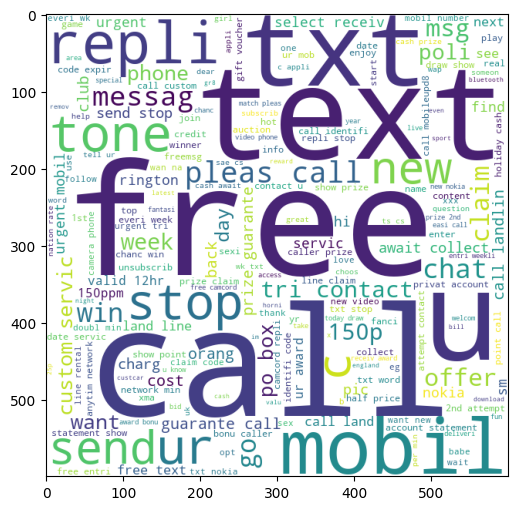

In [42]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [43]:
ham_wc = wc.generate(df[df['Category'] == 0]['transform_text'].str.cat(sep=" "))

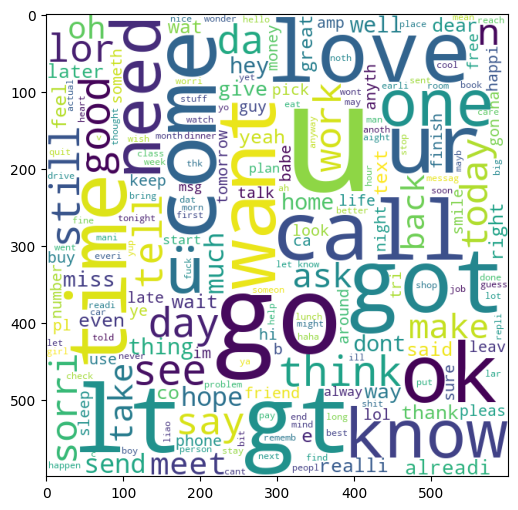

In [44]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [45]:
spam_corpus = []
for msg in df[df['Category'] == 1]['transform_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [46]:
len(spam_corpus)

9781

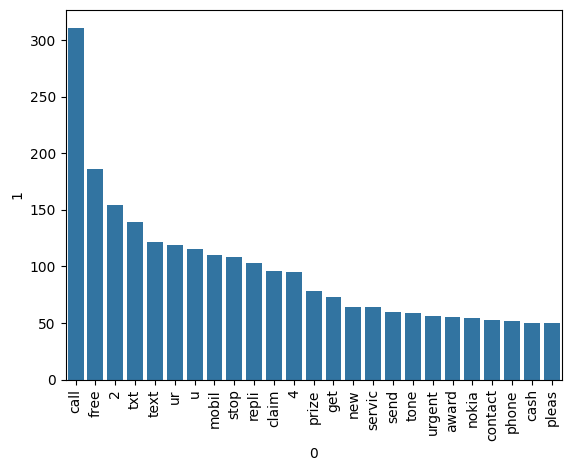

In [47]:
from collections import Counter
sns.barplot(x=pd.DataFrame(Counter(spam_corpus).most_common(25))[0],y=pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [48]:
ham_corpus = []
for msg in df[df['Category'] == 0]['transform_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [49]:
len(ham_corpus)

35940

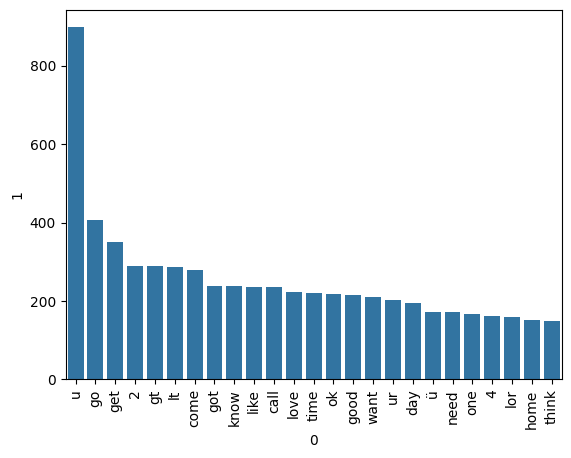

In [50]:
from collections import Counter
sns.barplot(x=pd.DataFrame(Counter(ham_corpus).most_common(25))[0],y=pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [51]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv=CountVectorizer()
tfidf=TfidfVectorizer(max_features=3000)

In [52]:
X=tfidf.fit_transform(df['transform_text']).toarray()

In [53]:
X.shape

(5157, 3000)

In [54]:
y=df['Category'].values

In [55]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [56]:
from sklearn.model_selection import train_test_split

In [57]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [58]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [59]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [60]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [61]:
gnb.fit(X_train,y_train)
y_pred1=gnb.predict(X_test)
print("Accuracy Score",accuracy_score(y_test,y_pred1))
print("Precision Score",precision_score(y_test,y_pred1))
print("Confusion Matrix",confusion_matrix(y_test,y_pred1))

Accuracy Score 0.8672480620155039
Precision Score 0.4782608695652174
Confusion Matrix [[785 120]
 [ 17 110]]


In [62]:
mnb.fit(X_train,y_train)
y_pred2=mnb.predict(X_test)
print("Accuracy Score",accuracy_score(y_test,y_pred2))
print("Precision Score",precision_score(y_test,y_pred2))
print("Confusion Matrix",confusion_matrix(y_test,y_pred2))

Accuracy Score 0.9709302325581395
Precision Score 1.0
Confusion Matrix [[905   0]
 [ 30  97]]


In [63]:
bnb.fit(X_train,y_train)
y_pred3=bnb.predict(X_test)
print("Accuracy Score",accuracy_score(y_test,y_pred3))
print("Precision Score",precision_score(y_test,y_pred3))
print("Confusion Matrix",confusion_matrix(y_test,y_pred3))

Accuracy Score 0.9835271317829457
Precision Score 0.9824561403508771
Confusion Matrix [[903   2]
 [ 15 112]]


In [64]:
classifiers={"svc":SVC(kernel='sigmoid', gamma=1.0),
            "knc": KNeighborsClassifier(),
             "mnb" : MultinomialNB(),
             "dtc" : DecisionTreeClassifier(max_depth=5),
             "lr" : LogisticRegression(solver='liblinear', penalty='l1'),
             "rfc" : RandomForestClassifier(n_estimators=50, random_state=2),
             "adb" : AdaBoostClassifier(n_estimators=50, random_state=2),
             "xgb" : XGBClassifier(n_estimators=50,random_state=2),
             "gbc" : GradientBoostingClassifier(n_estimators=50,random_state=2)
            }

In [65]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred=clf.predict(X_test)
    accuracy=accuracy_score(y_test,y_pred)
    precision=precision_score(y_test,y_pred)
    train_accuracy=clf.score(X_train,y_train)
    return accuracy,precision,train_accuracy

In [66]:
svc=SVC(kernel='sigmoid', gamma=1.0)
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9757751937984496, 0.9811320754716981, 0.9849696969696969)

In [67]:
accuracy_scores = []
precision_scores = []
train_accuracy_score=[]

for name,clf in classifiers.items():
    
    current_accuracy,current_precision,current_train_score = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)
    train_accuracy_score.append(current_train_score)
    print()

For  svc
Accuracy -  0.9757751937984496
Precision -  0.9811320754716981

For  knc
Accuracy -  0.9127906976744186
Precision -  1.0

For  mnb
Accuracy -  0.9709302325581395
Precision -  1.0

For  dtc
Accuracy -  0.935077519379845
Precision -  0.8125

For  lr
Accuracy -  0.9583333333333334
Precision -  0.9375

For  rfc
Accuracy -  0.9728682170542635
Precision -  1.0

For  adb
Accuracy -  0.9660852713178295
Precision -  0.9423076923076923

For  xgb
Accuracy -  0.9728682170542635
Precision -  0.9714285714285714

For  gbc
Accuracy -  0.9554263565891473
Precision -  0.9764705882352941



In [68]:
df1=pd.DataFrame({'Algorithm':classifiers.keys(),'Precision':precision_scores,
                  'Accuracy':accuracy_scores,'Train Accuracy':train_accuracy_score}).round(3)

In [69]:
df2=df1.sort_values(['Precision','Accuracy'],ascending=False)
df2

,Algorithm,Precision,Accuracy,Train Accuracy
5,rfc,1.000,0.973,1.000
2,mnb,1.000,0.971,0.978
1,knc,1.000,0.913,0.925
0,svc,0.981,0.976,0.985
8,gbc,0.976,0.955,0.969
7,xgb,0.971,0.973,0.986
6,adb,0.942,0.966,0.975
4,lr,0.938,0.958,0.966
3,dtc,0.812,0.935,0.950


In [70]:
df3=pd.melt(df2,id_vars="Algorithm")

In [71]:
df3.head()

,Algorithm,variable,value
0,rfc,Precision,1.000
1,mnb,Precision,1.000
2,knc,Precision,1.000
3,svc,Precision,0.981
4,gbc,Precision,0.976


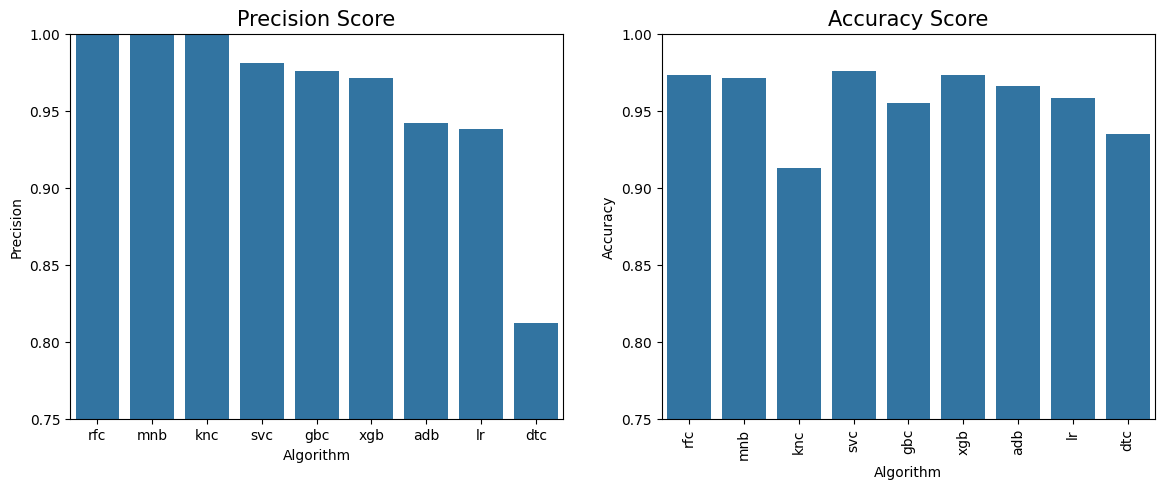

In [72]:
plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
sns.barplot(x="Algorithm",y="Precision",data=df2)
plt.title("Precision Score",size=15)
plt.ylim(0.75,1.0)
plt.subplot(1,2,2)
sns.barplot(x="Algorithm",y="Accuracy",data=df2)
plt.ylim(0.75,1.0)
plt.title("Accuracy Score",size=15)
plt.xticks(rotation='vertical')
plt.show()

In [73]:
import pickle
pickle.dump(tfidf,open('vectorize.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))